<a href="https://colab.research.google.com/github/AmazingGrace-D/LSTM-Test/blob/main/LSTM_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [17]:
series = np.sin((0.1 * np.arange(400)) ** 2)

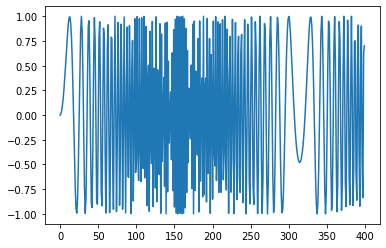

In [18]:
plt.plot(series)

In [23]:
T = 10
X = []
Y = []
D = 1

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, D) # N x T X D LSTM/SimpleRNN/GRU (shape)
Y = np.array(Y)
N = len(X)
print("X shape", X.shape, "Y shape", Y.shape, "Series Length", N, sep='\n')

X shape
(390, 10, 1)
Y shape
(390,)
Series Length
390


In [28]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.05)
)

r = model.fit(X[:-N//2], Y[:-N//2], 
          validation_data = (X[-N//2:], Y[-N//2:]),
          batch_size = 32,
          epochs = 200)

Epoch 1/200
7/7 [==============================] - 2s 76ms/step - loss: 0.5022 - val_loss: 0.5531
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4335 - val_loss: 0.5089
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3992 - val_loss: 0.5586
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2884 - val_loss: 0.3753
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2263 - val_loss: 0.4323
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1924 - val_loss: 0.3307
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1167 - val_loss: 0.2606
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1205 - val_loss: 0.1807
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0739 - val_loss: 0.1780
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0542 - val_loss: 0.1516
Epoch 11/200
7/7 [=

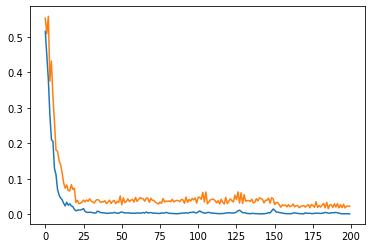

In [29]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

In [30]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  pred = model.predict(X[i].reshape(1, T, 1))[0, 0]

  validation_predictions.append(pred)

  i+=1


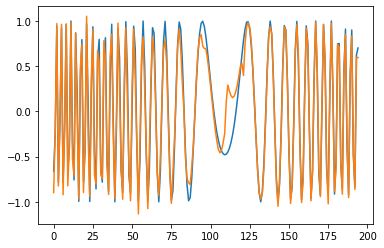

In [31]:
plt.plot(validation_target, label = 'forecast values')
plt.plot(validation_predictions, label = 'forecast predictions')

In [34]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  pred = model.predict(last_x.reshape(1, T, 1))[0, 0]

  validation_predictions.append(pred)

  last_x = np.roll(last_x, -1)
  last_x[-1] = pred

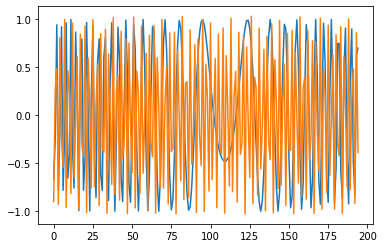

In [35]:
plt.plot(validation_target, label = 'forecast values')
plt.plot(validation_predictions, label = 'forecast predictions')